<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Lucas-F-Analysis/blob/main/Ferreyra_Lucas%2C_actividad_del_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El colab se encuentra ejecutado

De igual forma, el colab completo tarda unos 2 minutos y 15 segundos en ejecutarse aproximadamente

# Informe final

Luego de probar diferentes modelos con el set te datos del Titanic para predecir si un pasajero sobrevive o no, concluimos que con los datos del validation los mejores modelos que funcionaron fueron los Random Forest sin grid search con un accuracy de 88.11% para después tener un 86.03% de accuracy con los datos de train y test

Pero de todos los modelos probados con los datos de train y test el mejor modelo a utilizar es el Random Forest aplicando un Grid Search, para encontrar los mejores hiperparámetros de forma automática. Logrando un 87.15% con los sets de datos de entrenamiento y de evaluación. Aunque con los datos de validacion este modelo fue de los accuracy mas bajos dando asi un accuracy del 80.48 %

Viernes 04/10: Después de conocer el uso de Mutual Information y aplicarlo a este proyecto, me encuentro con que hay otro modelo de Random Forest que con los datos de validacion se logra un accuracy del 88.11%. Para luego entrenarlo y testearlo con los x_train y y_train lograr un accuracy del 87.15%

# Proyecto de Titanic
# Predecir si un pasajero sobrevive o no

Lo primero que debemos hacer es importar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic (1)/Titanic-Dataset.csv')

# 2) Entendiendo el set de datos

Lo segundo que voy a hacer va a ser obsevar el set de datos, explorar sus minimos, maximos, desviaciones, medias, etc.
Tambien voy a filtrar el set de datos en excel para ver si hay alguna variable que tenga correlación con la variable "survived"

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Ver valores nulos por columna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Vemos diferentes gráficos a ver que nos dicen

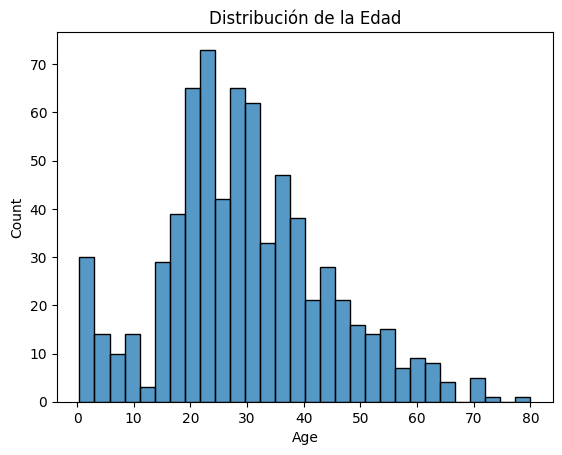

In [ ]:
# Gráfico de distribución de edades
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Distribución de la Edad')
plt.show()

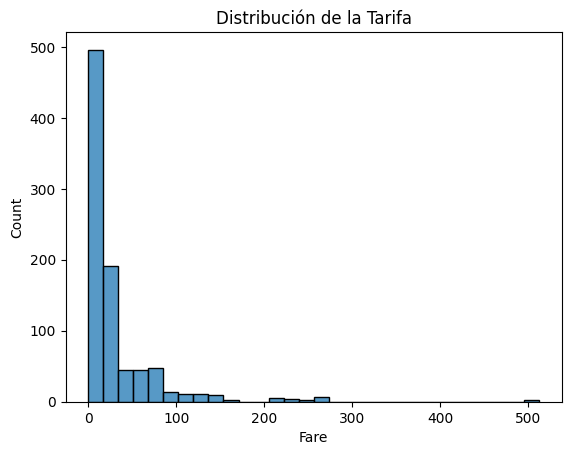

In [ ]:
# Grafico de la distribucion de tarifa
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Distribución de la Tarifa')
plt.show()

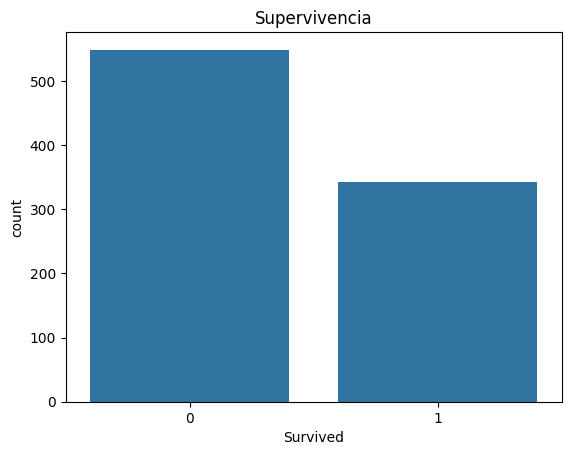

In [ ]:
# Grafico de superviviencia
sns.countplot(data=df, x='Survived')
plt.title('Supervivencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


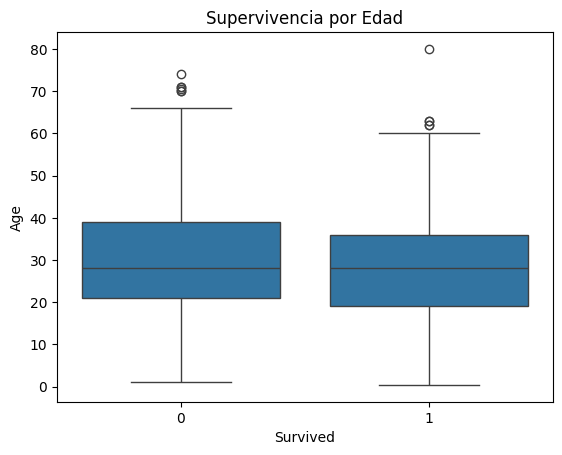

In [ ]:
# Boxplot de supervivencia por edad
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Supervivencia por Edad')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


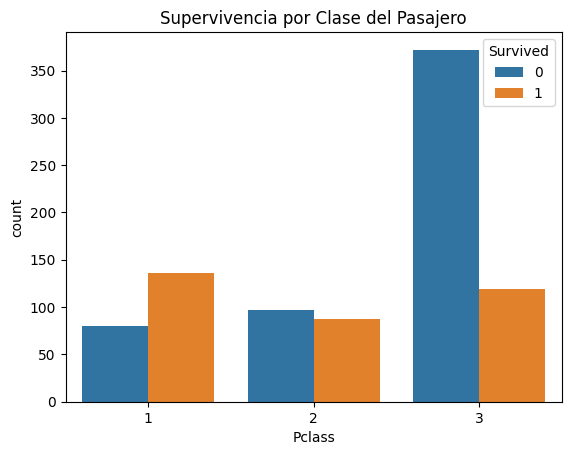

In [ ]:
# Grafico de barras de supervivencia por clase
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Supervivencia por Clase del Pasajero')
plt.show()

Vemos que porcentaje de hombres sobrevivió, y que porcentaje de mujeres sobrevivió. También por cantidades

In [ ]:
# Mostrar la cantidad de hombres y mujeres que sobrevivieron
survived_df = df[df['Survived'] == 1]
male_survived = survived_df[survived_df['Sex'] == 'male'].shape[0]
female_survived = survived_df[survived_df['Sex'] == 'female'].shape[0]
total_survived = male_survived + female_survived
# Calculate the percentage of male survivors
male_survived_percentage = (male_survived / total_survived) * 100
# Calculate the percentage of female survivors
female_survived_percentage = (female_survived / total_survived) * 100

print(f"Hay {survived_df.shape[0]} sobrevivientes")
print(f"Porcentaje de hombres que sobrevivió: {male_survived_percentage:.2f}%")
print(f"Porcentaje de mujeres que sobrevivió: {female_survived_percentage:.2f}%")
print(f"Sobrevivieron {male_survived} hombres de {df[df['Sex'] == 'male'].shape[0]} hombres y {female_survived} mujeres de {df[df['Sex'] == 'female'].shape[0]} mujeres")

Hay 342 sobrevivientes
Porcentaje de hombres que sobrevivió: 31.87%
Porcentaje de mujeres que sobrevivió: 68.13%
Sobrevivieron 109 hombres de 577 hombres y 233 mujeres de 314 mujeres


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


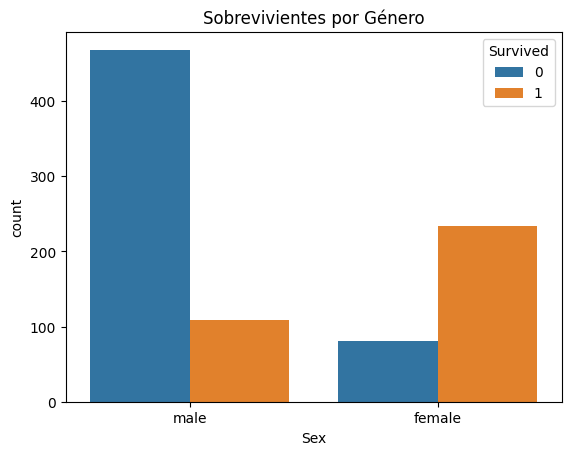

In [ ]:
# Graficar sobrevivientes por genero
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sobrevivientes por Género')
plt.show()

Con estos datos podemos observar que los datos nos dicen que han sobrevivido mas mujeres que hombres con un 68.13% de sobrevivientes mujeres del total de sobrevivientes, y un 31.87% de sobrevivientes hombres del total de sobrevivientes. Y sobrevivieron 109 hombres de 577 hombres y 233 mujeres de 314 mujeres

Lo que quiere decir que las mujeres tienen mejores posibilidades de superviviencia que la media

Y por lo tanto la columna "Sex" es una columna importante a considerar

# 3) Limpieza de los datos

Anteriormente vimos que tenemos valores nulos y faltantes en las columnas "Age", "Cabin" y "Embarked"

Tratando columna "Embarked"

In [ ]:
# Vemos cuantos "Embarked" hay por valor en el dataframe completo para saber cual es la moda
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# Imputar los valores de la columna "Embarked" con la moda
embarked_imputer = SimpleImputer(strategy='most_frequent')

df['Embarked_1'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Vemos cuantos "Embarked" hay por valor en el dataframe completo
df['Embarked_1'].value_counts()

,count
Embarked_1,
S,646
C,168
Q,77


Tratando columna "Age"

In [ ]:
# Veamos un panorama general de la columna "Age"
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
# Promedio de "Age" por filtro conjunto de "Pclass" y "Sex"
age_by_class_sex = df.groupby(['Pclass', 'Sex'])['Age'].mean()

print(age_by_class_sex)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


A continuación, lo que voy a hacer va a ser reemplazar los valores faltantes de la columna "Age" con el promedio de edad pero teniendo en cuenta este filtro doble mostrado en el cuadro de código anterior (valores filtrados por clase y género), es decir, que si existe un dato faltante de "Age" en la fila que hay un "Pclass" de 2 y sea hombre, este valor faltante se reemplaza por 30.74. Y si por ejemplo existe un valor de "Age" faltante en la fila que hay un "Pclass" de 3 y es mujer, se reemplaza con 21.75. Y asi sucesivamente

Creo que es mejor hacer esto en lugar de aplicarle un promedio general de todas las edades, ya que eso llevaria a tener una mayor variabilidad en la columna "Age", y lo haria mas alejado de la realidad. En cambio, aplicarle promedios con filtros dobles creo que lo hace mas preciso y mas cercano a la realidad

In [ ]:
# Crear copia del dataframe para no afectar al dataframe original
# df_copy = df.copy()

In [ ]:
age_means = df.groupby(['Pclass', 'Sex'])['Age'].mean()

# Función para reemplazar los valores faltantes en 'Age' con el promedio que corresponda
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_means[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df['Age_1'] = df.apply(impute_age, axis=1)

# Verificar si quedan valores nulos en 'Age_1'
print(df['Age_1'].isnull().sum())

0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Antes de pasar a limpiar la columna "Cabin" vamos a recodificar la columna "Sex"

In [ ]:
# Convertir generos en 0 y 1
df['Sex_1'] = df['Sex'].map({'male': 1, 'female': 0})

Tratando columna "Cabin"

No podemos imputar la columna "Cabin" porque tenemos demasiados valores faltantes y muy pocos datos

In [ ]:
df["Cabin"].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Observamos que hay mucha variabilidad en esta columna, es decir, muchas categorias, con 147 valores unicos. Necesitamos reducir esa cantidad

Si observamos bien los valores, tenemos letras y números, es decir, que podemos categorizar por letras y números, tenemos por ejemplo: C23 C25 C27, todas pertenecen a C.

De esta manera podemos reducir la cantidad de valores unicos de la columna "Cabin"

Para hacer esto, vamos a extraer los primeros caracteres de estos valores, pero de los valores unicos sin repetir, sin incluir a los faltantes

In [ ]:
# Crear un nuevo DataFrame con la columna 'Cabin_1' que contiene el primer carácter de 'Cabin'
df_cabin = df[['Cabin']].copy()
df_cabin['Cabin_1'] = df_cabin['Cabin'].str[0]

# Eliminar valores nulos en 'Cabin_1'
df_cabin.dropna(subset=['Cabin_1'], inplace=True)

# Eliminar valores duplicados en 'Cabin_1'
df_cabin.drop_duplicates(subset=['Cabin_1'], inplace=True)
df_cabin.drop(columns=['Cabin'], inplace=True)

# Mostrar el dataframe
print(df_cabin)

    Cabin_1
1         C
6         E
10        G
21        D
23        A
31        B
66        F
339       T


In [ ]:
# Crear la nueva columna 'Cabin_1' tomando el primer carácter de cada valor en 'Cabin'
df['Cabin_1'] = df['Cabin'].str[0]

# Crear un imputador para reemplazar valores nulos con 'M'
imputer = SimpleImputer(strategy='constant', fill_value='M')

# Imputar los valores en 'Cabin_1' and flatten the result to 1D array
df['Cabin_1'] = imputer.fit_transform(df[['Cabin_1']]).flatten()

Comprobación:

In [ ]:
df['Cabin_1'].value_counts()

,count
Cabin_1,
M,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


El unico problema que encontramos es que hay solo un registro con la cabina "T"

Seria interesante analizar los familiares, hermanos, padres, hijos y conyuges del dataframe. Ya que esto influye en la supervivencia, es mas dificil intentar salvar a una familia numerosa que a una familia pequeña, a la vez que salvar a una familia pequeña es mas dificil que salvar a una sola persona, también influye en el hecho de que se priorizan mujeres y niños, por lo tanto las posibilidades de supervivencia de un hombre con familia probablemente sean mas bajas. Estas circunstancias hacen que saber esto sea importante a la hora determinar si sobrevive o no. Por ende, saber si el pasajero vino en familia o no, es importante

Tratando "SibSp" y "Parch"

Vamos a crear una columna llamada "Family". Creamos esta columna para cada determinar si el pasajero vino con familia y cuantos.



In [ ]:
# Crear columna "Family" que sume la columna "SibSp" y "Parch" más 1
df['Family'] = df['SibSp'] + df['Parch'] + 1

Creamos una columna "IsAlone" para saber si el pasajero está solo o no

In [ ]:
# Crear columna "IsAlone" para saber si el pasajero está solo o no, donde 1 es "si, vino solo" y 0 es "no, no vino solo"
df['IsAlone'] = df['Family'].apply(lambda x: 1 if x == 1 else 0)

Ahora pasamos a tratar a la columna "Name", y vamos a crear una columna de titulo a partir de la variable "Name"

Ahora vamos a extraer caracteristicas de la variable "Name". Si observamos bien tenemos pasajeros que en su nombre contiene "Mr.", "Mrs.", "Miss", etc. Vamos a extraer estas caracteristicas

Esto es importante saberlo ya que determina el estatus de cada pasajero, alguien de la realeza probablemente tenga mayores probabilidades de sobrevivir que un simple pasajero debido a la prioridad que recibe. O volviendo al razonamiento de hombres mujeres, probablemente alguien que contenga "Miss" en su nombre tenga mas probabilidades de vivir, ya que es mujer. También determinan la profesión de cada pasajero

In [ ]:
# Extraer el título de la columna 'Name' y crear una nueva columna 'Title'
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

df[['Name', 'Title']]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


Mr: Título para hombres adultos. Es el equivalente a "Señor" en español. La mayoría de los hombres en el Titanic tienen este título.

Miss: Se refiere a mujeres jóvenes o solteras. Equivalente a "Señorita" en español.

Mrs: Título utilizado para mujeres casadas. Equivale a "Señora" en español.

Master: Se refiere a niños o varones jóvenes, generalmente menores de edad.

Dr: Se refiere a un doctor o alguien con un título académico avanzado.

Rev: Abreviación de "Reverend", es decir, un reverendo o clérigo.

Mlle: Abreviación de "Mademoiselle", título francés para "Señorita" (equivalente a Miss).

Major: Título militar que hace referencia a un "Mayor" en el ejército.

Col: Abreviación de "Colonel" (Coronel en español), también un título militar.

Countess: Hace referencia a una "Condesa", título nobiliario femenino.

Capt: Abreviación de "Captain" (Capitán), un título militar o marítimo.

Ms: Título moderno para mujeres que no indica el estado civil. Equivale a "Sra." o "Srta." en español.

Sir: Título honorífico que se le otorga a los caballeros, generalmente de la nobleza británica o personas con una distinción especial.

Lady: Título nobiliario femenino, generalmente la contraparte de "Sir".

Mme: Abreviación de "Madame", título francés equivalente a "Señora" (Mrs.).

Don: Título honorífico que se usa en algunos países, como España, para hombres de alto estatus o respeto.

Jonkheer: Título holandés de nobleza, generalmente se traduce como "gentil hombre" o "caballero".

Seguimos teniendo mucha variabilidad, además de que algunos valores significan lo mismo, tenemos muchas categorias, por lo tanto podemos recategorizar algunos valores. Por ejemplo: Ms es lo mismo que Miss, y Mme es lo mismo que Mrs, y Mlle es lo mismo que Miss. Luego Don, Rev, Dr, Major, Lady, Sir, Col, Capt, Countess y Jonkheer se puede recategorizar como "Realeza"

In [ ]:
# Reemplazar "Ms" y "Mlle" por "Miss". Reemplazar "Mme" por "Mrs", y reemplazar "Don", "Rev", "Dr", "Major", "Lady", "Sir", "Col", "Capt", "Countess" y "Jonkheer" por "Royalty"
df['Title_1'] = df['Title'].replace({
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Royalty',
    'Rev': 'Royalty',
    'Dr': 'Royalty',
    'Major': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Col': 'Royalty',
    'Capt': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
})

In [ ]:
df['Title_1'].value_counts()

,count
Title_1,
Mr,517
Miss,185
Mrs,126
Master,40
Royalty,23


Tratando variable "Ticket"

In [ ]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [ ]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
len(df['Ticket'].unique())

681

En la variable "Ticket" podemos observar una gran variabilidad, con letras y numeros en sus valores, muchos valores contienen barras y puntos.

Basicamente tenemos algunos patrones en estos valores

Tenemos patrones como:

numero

< letra > numero


<letra+.+/> numero

Lo que vamos a hacer es limpiar el punto y la barra, para que solo tengamos dos formatos.
El de numero y el de < letra > numero

Teniendo en cuenta que tenemos 681 valores unicos, vamos a separar los valores que son solo numericos de los demas

Lo que hace esta funcion es analizar cada valor de la columna "Ticket", y si el valor es completamente numérico, es decir, que contiene solo numeros, se transforme en "xx", y si el valor no es puramente numerico que a ese valor se le elimine la barra o el punto

In [ ]:
# Función para procesar cada ticket
def process_ticket(ticket):
    if ticket.isdigit():  # Si el valor es puramente numérico
        return 'xx'
    else:
        # Si el valor no es numérico, eliminamos barras y puntos
        return ticket.replace('/', '').replace('.', '')

# Aplicamos la función para crear la nueva columna 'Ticket_Inter'
df['Ticket_Inter'] = df['Ticket'].apply(process_ticket)


In [ ]:
df['Ticket_Inter'].value_counts()

,count
Ticket_Inter,
xx,661
CA 2343,7
CA 2144,6
SOC 14879,5
PC 17757,4
...,...
FCC 13528,1
SOTONOQ 3101311,1
A5 3540,1


Podemos ver que reducimos la variabilidad de 681 a 168

Aunque seguimos teniendo mucha variabilidad. Por lo tanto, vamos a hacer algo similar a lo que hicimos anteriormente con "Cabin", pero en este caso vamos a extraer los primeros caracteres pero antes de encontrar un espacio, es decir, que si tenemos un valor como "A5 3540" se extraiga "A5", si tenemos "SOTONOQ 392076" se extraiga solo "SOTONOQ".

Podemos observar que muchos de los valores que tenemos contienen dos letras y luego los numeros, por lo tanto usaremos esta información

In [ ]:
# Crear la columna 'Ticket_Inter2' con los primeros caracteres de 'Ticket_Inter' antes de un espacio
df['Ticket_Inter2'] = df['Ticket_Inter'].str.split().str[0]

In [ ]:
# Modificar los valores "SCPARIS" a "SCParis"
df['Ticket_Inter2'] = df['Ticket_Inter2'].replace('SCPARIS', 'SCParis')

In [ ]:
df['Ticket_Inter2'].value_counts()

,count
Ticket_Inter2,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
A4,7


In [ ]:
len(df['Ticket_Inter2'].unique())

30

Ahora bajamos la variabilidad hasta 30

Aun asi sigue siendo alta, por lo que convertiremos los valores que aparezcan 1 vez en una categoria llamada "Single", esto lo sabemos por observar el value_counts() aplicado anteriormente

In [ ]:
df['Ticket_1'] = df['Ticket_Inter2'].replace({
    'CASOTON': 'Single',
    'SCA4': 'Single',
    'SOP': 'Single',
    'Fa': 'Single',
    'SP': 'Single',
    'SC': 'Single',
    'SCOW': 'Single',
    'AS': 'Single',
    'FC': 'Single',
})

In [ ]:
df['Ticket_1'].value_counts()

,count
Ticket_1,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
Single,9


In [ ]:
len(df["Ticket_1"].unique())

22

In [ ]:
# Acceder a los valores de "Ticket_1" que contengan "Single"
df[df['Ticket_1'] == 'Single']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_1,Sex_1,Cabin_1,Family,IsAlone,Title,Title_1,Ticket_Inter,Ticket_Inter2,Ticket_1
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,...,26.507589,1,M,1,1,Mr,Mr,SCA4 23567,SCA4,Single
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,...,19.000000,1,M,1,1,Mr,Mr,SP 3464,SP,Single
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,...,51.000000,1,M,1,1,Rev,Royalty,SOP 1166,SOP,Single
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,...,26.507589,1,M,1,1,Mr,Mr,Fa 265302,Fa,Single
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,...,33.000000,1,M,1,1,Mr,Mr,SCOW 1585,SCOW,Single
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,...,17.000000,0,M,1,1,Miss,Miss,SC 1748,SC,Single
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,...,26.507589,1,M,1,1,Mr,Mr,AS 2816,AS,Single
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,...,31.000000,1,B,2,0,Mr,Mr,FC 12750,FC,Single
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,...,28.000000,1,M,1,1,Mr,Mr,CASOTON 34068,CASOTON,Single


Y de esta manera llevamos 681 valores univos de la columna "Ticket" a 22 valores unicos, reduciendo su variabilidad significativamente

Tratando la variable "Age_1"

Lo que hago acá es agrupar a los pasajeros por edad, aplicandoles una categoria, por ejemplo, si tiene entre 0 y 5 años se lo categoriza como un "bebe", si tiene entre 6 y 10 años se categoriza como niño, si tiene entre "18 y 46 se lo categoriza como "adulto". Todo esto aplicado a una columna nueva llamada "Age_Category" creada a partir de la columna "Age_1" creada anteriormente

In [ ]:
def categorize_age(age):
    if pd.isna(age):
        return 'desconocido'  # Para manejar valores NaN
    elif 0 <= age <= 5:
        return 'bebe'
    elif 6 <= age <= 10:
        return 'niño'
    elif 11 <= age <= 14:
        return 'adolescente'
    elif 15 <= age <= 17:
        return 'adolescente grande'
    elif 18 <= age <= 46:
        return 'adulto'
    elif 41 <= age <= 55:
        return 'adulto mayor'
    elif 56 <= age <= 62:
        return 'adulto anciano'
    elif 63 <= age <= 80:
        return 'anciano'
    else:
        return 'desconocido'

In [ ]:
df['Age_1'].value_counts()

,count
Age_1,
26.507589,94
21.750000,42
24.000000,30
22.000000,27
18.000000,26
...,...
14.500000,1
70.500000,1
12.000000,1


In [ ]:
df['Age_Category'] = df['Age_1'].apply(categorize_age)

In [ ]:
# Codificamos valores numericos para estos diferentes grupos etarios
age_mapping = {
    'bebe': 0,
    'niño': 1,
    'adolescente': 2,
    'adolescente grande': 3,
    'adulto': 4,
    'adulto mayor': 5,
    'adulto anciano': 6,
    'anciano': 7,
    'desconocido': 8  # Para manejar valores que no encajan en las categorías
}

In [ ]:
# Crear nueva columna para aplicar esta codificación
df['Age_Category_1'] = df['Age_Category'].map(age_mapping)

In [ ]:
df['Age_Category_1']

,Age_Category_1
0,4
1,4
2,4
3,4
4,4
...,...
886,4
887,4
888,4
889,4


# Uso de OneHotEncoder

Ahora lo que haremos será usar OneHotEncoder para poder distribuir los pesos de los valores de las variables que creamos.

Por ejemplo: con la columna "Title_1" o "Tittle" tenemos Mr., Mrs., Miss., Master y Royalty. En lugar de solo reemplazar estos valores categóricos por números, vamos a crear nuevas columnas para cada uno de estos valores, teniendo asi una columna para Mr., otra para Mrs., otra para Miss, otra para Master, y otra para Royalty. De modo que si el pasajero es Mr. en la columna Mr. se encuentre el valor de 1, y en el resto de las columnas se encuentren el valor 0

Haremos esto para las columnas 'Title_1', 'Embarked_1', 'Cabin_1', "Ticket_1", "Sex_1", "Age_Category_1"

In [ ]:
# Crear el OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop=None)

# Seleccionar las columnas a codificar
columnas_a_encode = df[['Title_1', 'Embarked_1', 'Cabin_1', "Ticket_1", "Sex_1", "Age_Category_1"]]

# Aplicar el OneHotEncoder
df_encode = encoder.fit_transform(columnas_a_encode)

# Convertir a DataFrame con los nombres de las nuevas columnas
df_encode = df_encode.toarray()
encoded_df = pd.DataFrame(df_encode, columns=encoder.get_feature_names_out(['Title_1', 'Embarked_1', 'Cabin_1', 'Ticket_1', 'Sex_1', 'Age_Category_1']))

# Añadir las columnas codificadas al DataFrame original
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df["Age_Category"]

,Age_Category
0,adulto
1,adulto
2,adulto
3,adulto
4,adulto
...,...
886,adulto
887,adulto
888,adulto
889,adulto


In [ ]:
# Observamos como tenemos nuestro df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_1_1,Age_Category_1_0,Age_Category_1_1,Age_Category_1_2,Age_Category_1_3,Age_Category_1_4,Age_Category_1_5,Age_Category_1_6,Age_Category_1_7,Age_Category_1_8
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Ver dataframe con todas las columnas existentes
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Age_1',
       'Sex_1', 'Cabin_1', 'Family', 'IsAlone', 'Title', 'Title_1',
       'Ticket_Inter', 'Ticket_Inter2', 'Ticket_1', 'Age_Category',
       'Age_Category_1', 'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr',
       'Title_1_Mrs', 'Title_1_Royalty', 'Embarked_1_C', 'Embarked_1_Q',
       'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D',
       'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M', 'Cabin_1_T',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_Single',
       'Ticket_1_WC', 'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0'

Ahora vamos a quitar las columnas que no tienen mucha relevancia, por ejemplo en la variable "Cabin_1" el valor T aparecía una sola vez. O "Royalty" que aparece pocas veces, el "Embarked_1" con el valor "Q" que es el que menos aparece. Y con el valor "Single" de la columna "Ticket_1" que también es el valor que menos aparece

Además de que vamos a usar las variables que creamos para pasarle a los modelos de Aprendizaje Automático

In [ ]:
# Eliminar del set de datos las columnas "Title_1_Royalty", "Embarked_1_Q", "Ticket_1_Single", "Cabin_1_T" y "Sex_1"
df = df.drop(['Title_1_Royalty', 'Embarked_1_Q', 'Ticket_1_Single', 'Cabin_1_T', 'Sex_1', 'Age_1'], axis=1)

In [ ]:
# Acceder a la columna "Ticket_1_Single"
df["Ticket_1"].value_counts()

,count
Ticket_1,
xx,661
PC,60
CA,41
A5,21
SOTONOQ,15
STONO,12
SCParis,11
WC,10
Single,9


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Cabin_1',
       'Family', 'IsAlone', 'Title', 'Title_1', 'Ticket_Inter',
       'Ticket_Inter2', 'Ticket_1', 'Age_Category', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC',
       'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Categor

# Modelos de IA

Ahora si vamos a aplicarle un modelo de machine Learning a nuestros datos

Vamos a tomar las variables mas relevantes para el modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_1', 'Cabin_1',
       'Family', 'IsAlone', 'Title', 'Title_1', 'Ticket_Inter',
       'Ticket_Inter2', 'Ticket_1', 'Age_Category', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
       'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA',
       'Ticket_1_FCC', 'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP',
       'Ticket_1_PPP', 'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC',
       'Ticket_1_SOPP', 'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ',
       'Ticket_1_STONO', 'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC',
       'Ticket_1_WEP', 'Ticket_1_xx', 'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Categor

In [ ]:
x = df[['Pclass', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Category_1_3',
       'Age_Category_1_4', 'Age_Category_1_5', 'Age_Category_1_6',
       'Age_Category_1_7', 'Age_Category_1_8',
        'Fare', 'Family', 'IsAlone',
        'Title_1_Mr', 'Title_1_Mrs', 'Title_1_Master', 'Title_1_Miss',
        'Embarked_1_C', 'Embarked_1_S',
        'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
        'Ticket_1_A4', 'Ticket_1_A5', 'Ticket_1_C', 'Ticket_1_CA', 'Ticket_1_FCC',
        'Ticket_1_LINE', 'Ticket_1_PC', 'Ticket_1_PP', 'Ticket_1_PPP',
        'Ticket_1_SCAH', 'Ticket_1_SCParis', 'Ticket_1_SOC', 'Ticket_1_SOPP',
        'Ticket_1_SOTONO2', 'Ticket_1_SOTONOQ', 'Ticket_1_STONO',
        'Ticket_1_STONO2', 'Ticket_1_SWPP', 'Ticket_1_WC', 'Ticket_1_WEP',
        'Ticket_1_xx', "Sex_1_0", "Sex_1_1"]]

y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
# Datos de validacion
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

# Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
log = LogisticRegression(solver = 'lbfgs')
log.fit(x_val_train, y_val_train)
prediclog = log.predict(x_val_test)

acclog = accuracy_score(y_val_test, prediclog)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acclog

0.8321678321678322

In [ ]:
print(classification_report(y_val_test, prediclog))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        90
           1       0.75      0.83      0.79        53

    accuracy                           0.83       143
   macro avg       0.82      0.83      0.82       143
weighted avg       0.84      0.83      0.83       143



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_val_train, y_val_train)
predicTree = tree.predict(x_val_test)

accTree = accuracy_score(y_val_test, predicTree)

In [ ]:
accTree

0.7972027972027972

In [ ]:
best_columns = pd.DataFrame({'Columns': x_val_train.columns, 'Importance': tree.feature_importances_})
best_columns.sort_values(by='Importance', ascending=False)

,Columns,Importance
13,Title_1_Mr,0.335526
10,Fare,0.213369
0,Pclass,0.094955
11,Family,0.068393
26,Cabin_1_M,0.036499
5,Age_Category_1_4,0.031137
47,Ticket_1_xx,0.027452
12,IsAlone,0.025451
48,Sex_1_0,0.023615
4,Age_Category_1_3,0.017133


# Random Forest

Primer intento

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
arboles = [50, 100, 150]
profundidades = [None, 10, 20, 30]
var_min_samples_split = [2, 5, 10]
var_min_samples_leaf = [1, 2, 4]

resultados = []

for i in arboles:
    for j in profundidades:
      for k in var_min_samples_split: # k should be an integer value from var_min_samples_split, not the list itself
        for l in var_min_samples_leaf:
          RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l) # Pass the integer k
          RF.fit(x_val_train, y_val_train)
          predicRF = RF.predict(x_val_test)
          accRF = accuracy_score(y_val_test, predicRF)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Guardar los resultados en la lista
          resultados.append((i, j, k, l, accRF))

# Ordenar los resultados por accuracy en orden descendente
resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# Mostrar los 5 mejores resultados
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
    print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: Árboles: 100, Profundidad: 20, min_samples_split: 10, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 2: Árboles: 100, Profundidad: 20, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 3: Árboles: 100, Profundidad: 20, min_samples_split: 5, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 4: Árboles: 150, Profundidad: 20, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 5: Árboles: 150, Profundidad: 20, min_samples_split: 5, min_samples_leaf: 4, Accuracy: 0.8741258741258742


In [ ]:
RFOff4 = RandomForestClassifier(n_estimators=100, random_state=20, min_samples_split=10, min_samples_leaf=4)
RFOff4.fit(x_train, y_train)
predicRFOff4 = RFOff4.predict(x_test)
accRFOff4 = accuracy_score(y_test, predicRFOff4)
accRFOff4

0.8603351955307262

Segundo intento

In [ ]:
arboles = range(48, 51)
profundidades = range(48, 51)
var_min_samples_split = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
var_min_samples_leaf = [3,4]  # Número mínimo de muestras en una hoja

resultados = []

for i in arboles:
    for j in profundidades:
      for k in var_min_samples_split:
        for l in var_min_samples_leaf:
          RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
          RF.fit(x_val_train, y_val_train)
          predicRF = RF.predict(x_val_test)
          accRF = accuracy_score(y_val_test, predicRF)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Guardar los resultados en la lista
          resultados.append((i, j, k, l, accRF))

# Ordenar los resultados por accuracy en orden descendente
resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# Mostrar los 5 mejores resultados
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
    print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: Árboles: 50, Profundidad: 50, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 2: Árboles: 50, Profundidad: 50, min_samples_split: 3, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 3: Árboles: 50, Profundidad: 50, min_samples_split: 4, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 4: Árboles: 50, Profundidad: 50, min_samples_split: 5, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 5: Árboles: 50, Profundidad: 50, min_samples_split: 6, min_samples_leaf: 4, Accuracy: 0.8811188811188811


Podemos observar que los mejores parámetros para el modelo Random Forest son:

Árboles: 50, Profundidad: 50, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8811188811188811

In [ ]:
RFOff = RandomForestClassifier(n_estimators=11, random_state=40, min_samples_split=2, min_samples_leaf=7)
RFOff.fit(x_train, y_train)
predicRFOff = RFOff.predict(x_test)
accRFOff = accuracy_score(y_test, predicRFOff)
accRFOff

0.8603351955307262

In [ ]:
# arboles = [10,30,50,70,90,115, 134,150, 175, 190]
# profundidades = [10,30,50,70,90,115, 134,150, 175, 190]
# var_min_samples_split = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
# var_min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras en una hoja

# resultados = []

# for i in arboles:
#     for j in profundidades:
#       for k in var_min_samples_split:
#         for l in var_min_samples_leaf:
#           RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
#           RF.fit(x_val_train, y_val_train)
#           predicRF = RF.predict(x_val_test)
#           accRF = accuracy_score(y_val_test, predicRF)
#           print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
#           # Guardar los resultados en la lista
#           resultados.append((i, j, k, l, accRF))

# # Ordenar los resultados por accuracy en orden descendente
# resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# # Mostrar los 5 mejores resultados
# for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
#     print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

In [ ]:
# arboles = [10, 20,30,40,50,60,70,80,90,100,115,130,150, 160, 175, 190, 200]
# profundidades = [10, 20,30,40,50,60,70,80,90,100,115,130,150, 160, 175, 190, 200]
# var_min_samples_split = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
# var_min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras en una hoja


# resultados = []

# for i in arboles:
#     for j in profundidades:
#       for k in var_min_samples_split:
#         for l in var_min_samples_leaf:
#           RF = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
#           RF.fit(x_val_train, y_val_train)
#           predicRF = RF.predict(x_val_test)
#           accRF = accuracy_score(y_val_test, predicRF)
#           print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
#           # Guardar los resultados en la lista
#           resultados.append((i, j, k, l, accRF))

# # Ordenar los resultados por accuracy en orden descendente
# resultados_ordenados = sorted(resultados, key=lambda x: x[4], reverse=True)

# # Mostrar los 5 mejores resultados
# for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados[:5]):
#     print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

# Random Forest con Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(x_val_train, y_val_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mostrar la mejor precisión obtenida
print("Mejor precisión:", grid_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_val_test)
accuracy = accuracy_score(y_val_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor precisión: 0.8048750194069244
Precisión en el conjunto de prueba: 0.7972027972027972


In [ ]:
RFOff3 = RandomForestClassifier(n_estimators=100, max_depth= None, min_samples_split=5, min_samples_leaf=1)
RFOff3.fit(x_train, y_train)
predicRFOff3 = RFOff3.predict(x_test)
accRFOff3 = accuracy_score(y_test, predicRFOff3)
accRFOff3

0.8715083798882681

In [ ]:
best_columns = pd.DataFrame({'Columns': x_train.columns, 'Importance': RFOff3.feature_importances_})
best_columns.sort_values(by='Importance', ascending=False)

,Columns,Importance
10,Fare,0.190483
13,Title_1_Mr,0.131428
49,Sex_1_1,0.097036
48,Sex_1_0,0.094348
0,Pclass,0.074000
11,Family,0.066206
26,Cabin_1_M,0.036490
16,Title_1_Miss,0.034676
14,Title_1_Mrs,0.034024
12,IsAlone,0.023284


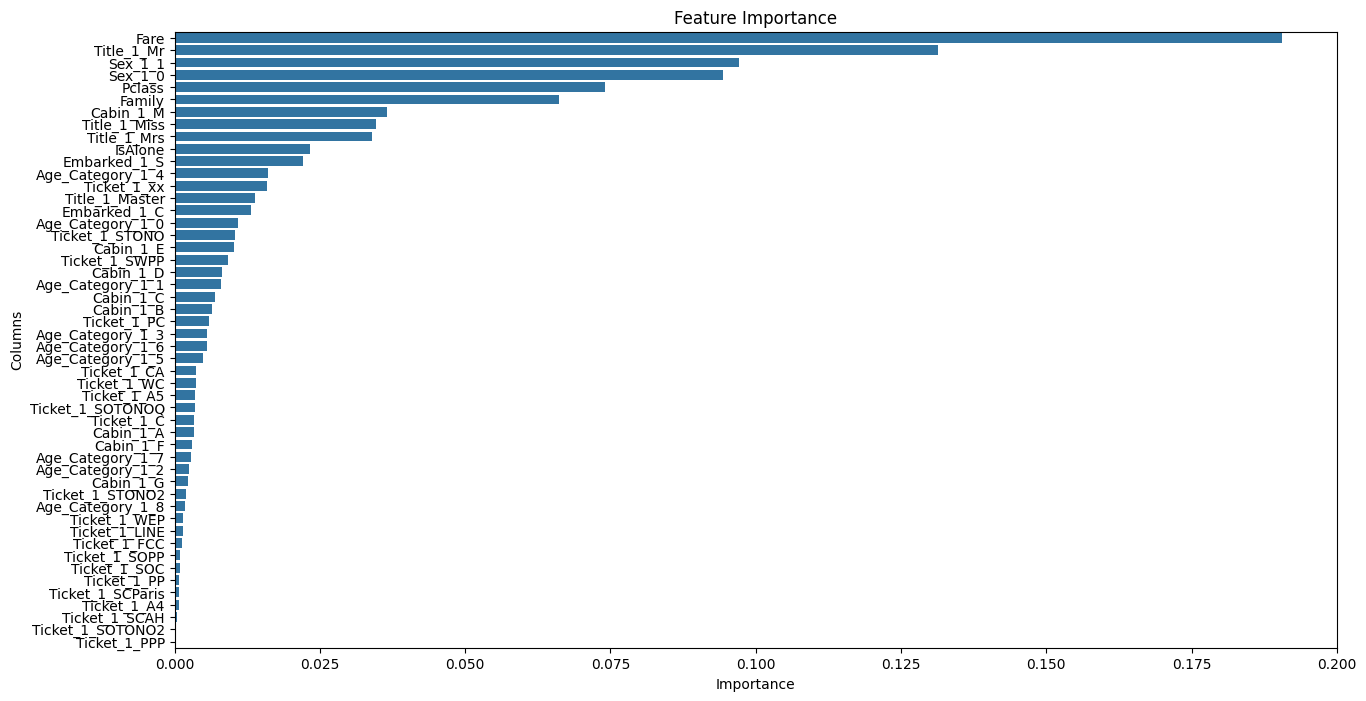

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las columnas por importancia
best_columns_sorted = best_columns.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Columns', data=best_columns_sorted)

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Columns')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=123)

In [ ]:
RF.fit(x_val_train, y_val_train)

RandomForestClassifier(random_state=123)

In [ ]:
parametrosRF = {'n_estimators' : (10, 30, 50, 70, 90, 100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)}

In [ ]:
RF_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parametrosRF, cv=3, verbose = True)

In [ ]:
# RF_grid.fit(x_val_train, y_val_train)

In [ ]:
# best_paramsRF = RF_grid.best_estimator_
# print("Mejores parámetros encontrados:", best_paramsRF)

In [ ]:
# RFG = RandomForestClassifier(max_depth=9, max_features = 'sqrt', min_samples_split=6, n_estimators=90, n_jobs=-1)

In [ ]:
# RFG.fit(x_train, y_train)

In [ ]:
# predictRFG = RFG.predict(x_test)

In [ ]:
# prediccionesRFG = RFG.predict(x_test)

# print(classification_report(y_test, prediccionesRFG))

In [ ]:
# accRFG = accuracy_score(y_test, prediccionesRFG)
# accRFG

# Uso de Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Asegúrate de que tus datos estén en formato numérico
X = x.select_dtypes(include=['int64', 'float64', 'uint8'])  # Filtra las variables numéricas

# Calcula la información mutua
mi = mutual_info_classif(x, y, random_state=123)

# Crea un DataFrame para visualizar los resultados
mi_df = pd.DataFrame({'Variable': X.columns, 'Información Mutua': mi})
mi_df = mi_df.sort_values(by='Información Mutua', ascending=False)

print(mi_df)

            Variable  Información Mutua
49           Sex_1_1           0.172963
48           Sex_1_0           0.142228
13        Title_1_Mr           0.138300
10              Fare           0.134113
14       Title_1_Mrs           0.063729
0             Pclass           0.060867
11            Family           0.048386
16      Title_1_Miss           0.035379
1   Age_Category_1_0           0.031031
33       Ticket_1_PC           0.028381
12           IsAlone           0.026005
6   Age_Category_1_5           0.024547
28       Ticket_1_A5           0.023257
26         Cabin_1_M           0.022382
5   Age_Category_1_4           0.019363
42    Ticket_1_STONO           0.017863
2   Age_Category_1_1           0.011841
4   Age_Category_1_3           0.011193
45       Ticket_1_WC           0.010583
30       Ticket_1_CA           0.009179
46      Ticket_1_WEP           0.008891
20         Cabin_1_B           0.006843
17      Embarked_1_C           0.005779
23         Cabin_1_E           0.005031


Borramos las variables de Tickets ya que parecen que nos ofrecen poca o nula información

In [ ]:
x2 = df[['Pclass', 'Fare',
       'Family', 'IsAlone', 'Age_Category_1',
       'Title_1_Master', 'Title_1_Miss', 'Title_1_Mr', 'Title_1_Mrs',
       'Embarked_1_C', 'Embarked_1_S', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_M',
        'Sex_1_0', 'Sex_1_1', 'Age_Category_1_0',
       'Age_Category_1_1', 'Age_Category_1_2', 'Age_Category_1_3',
       'Age_Category_1_4', 'Age_Category_1_5', 'Age_Category_1_6',
       'Age_Category_1_7', 'Age_Category_1_8']]

y2 = df['Survived']

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=123)

In [ ]:
x2_val_train, x2_val_test, y2_val_train, y2_val_test = train_test_split(x2_train, y2_train, test_size=0.2, random_state=123)

In [ ]:
arboles2 = range(48, 51)
profundidades2 = range(48, 51)
var_min_samples_split2 = [2,3,4,5,6,7,8,9,10]  # Número mínimo de muestras para dividir un nodo
var_min_samples_leaf2 = [3,4]  # Número mínimo de muestras en una hoja

resultados2 = []

for i in arboles2:
    for j in profundidades2:
      for k in var_min_samples_split2:
        for l in var_min_samples_leaf2:
          RF7 = RandomForestClassifier(n_estimators=i, random_state=j, min_samples_split=k, min_samples_leaf=l)
          RF7.fit(x2_val_train, y2_val_train)
          predicRF7 = RF7.predict(x2_val_test)
          accRF7 = accuracy_score(y2_val_test, predicRF7)
          # print(f"Arboles: {i}, Profundidad: {j}, accuracy: {accRF}, min_samples_split: {k}, min_samples_leaf:{l}")
          # Guardar los resultados en la lista
          resultados2.append((i, j, k, l, accRF7))

# Ordenar los resultados por accuracy en orden descendente
resultados_ordenados2 = sorted(resultados2, key=lambda x2: x2[4], reverse=True)

# Mostrar los 5 mejores resultados
for idx, (n_estimators, max_depth, min_samples_split, min_samples_leaf, acc) in enumerate(resultados_ordenados2[:5]):
    print(f"Top {idx+1}: Árboles: {n_estimators}, Profundidad: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, Accuracy: {acc}")

Top 1: Árboles: 49, Profundidad: 48, min_samples_split: 10, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 2: Árboles: 50, Profundidad: 48, min_samples_split: 10, min_samples_leaf: 4, Accuracy: 0.8811188811188811
Top 3: Árboles: 48, Profundidad: 48, min_samples_split: 2, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 4: Árboles: 48, Profundidad: 48, min_samples_split: 3, min_samples_leaf: 4, Accuracy: 0.8741258741258742
Top 5: Árboles: 48, Profundidad: 48, min_samples_split: 4, min_samples_leaf: 4, Accuracy: 0.8741258741258742


In [ ]:
RFOff8 = RandomForestClassifier(n_estimators=49, max_depth = 48, min_samples_split=10, min_samples_leaf=4)
RFOff8.fit(x2_train, y2_train)
predicRFOff8 = RFOff8.predict(x2_test)
accRFOff8 = accuracy_score(y2_test, predicRFOff8)
accRFOff8

0.8715083798882681